In [1]:
print("Hello Group 9")

Hello Group 9


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

## Tổng quan và đánh giá về dữ liệu

In [3]:
df = pd.read_csv("Traffic.csv")
df.head(5)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
df.shape

(2976, 9)

In [5]:
df['Date'].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9],
      dtype=int64)

Dữ liệu trong tháng từ ngày 10 của tháng này đến ngày 9 của tháng sau

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [7]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [8]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

Dữ liệu rất đẹp, các feature không có ô nào missing nên không cần phải làm sạch 

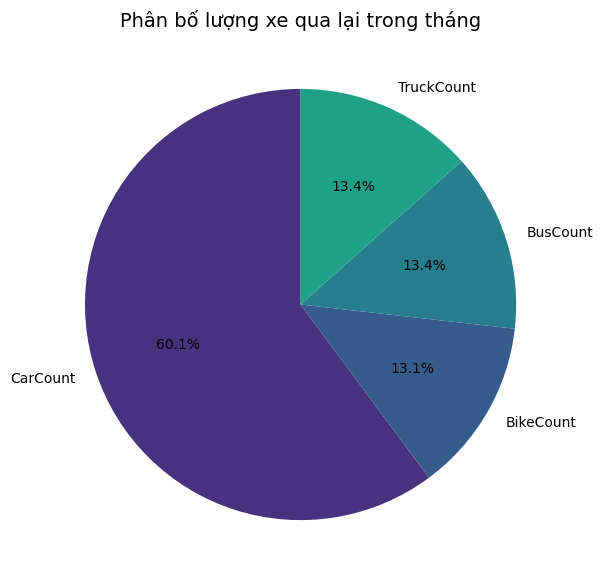

In [9]:
# Pie chart for average contribution of each vehicle type to total traffic
average_vehicle_counts = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()

plt.figure(figsize=(7, 7))
plt.pie(average_vehicle_counts, labels=average_vehicle_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

plt.title('Phân bố lượng xe qua lại trong tháng', fontsize=14)
plt.show()

Tỉ lệ người dân tham gia giao thông bằng ô tô khá nhiều và các hình thức khác khá cân bằng nhau

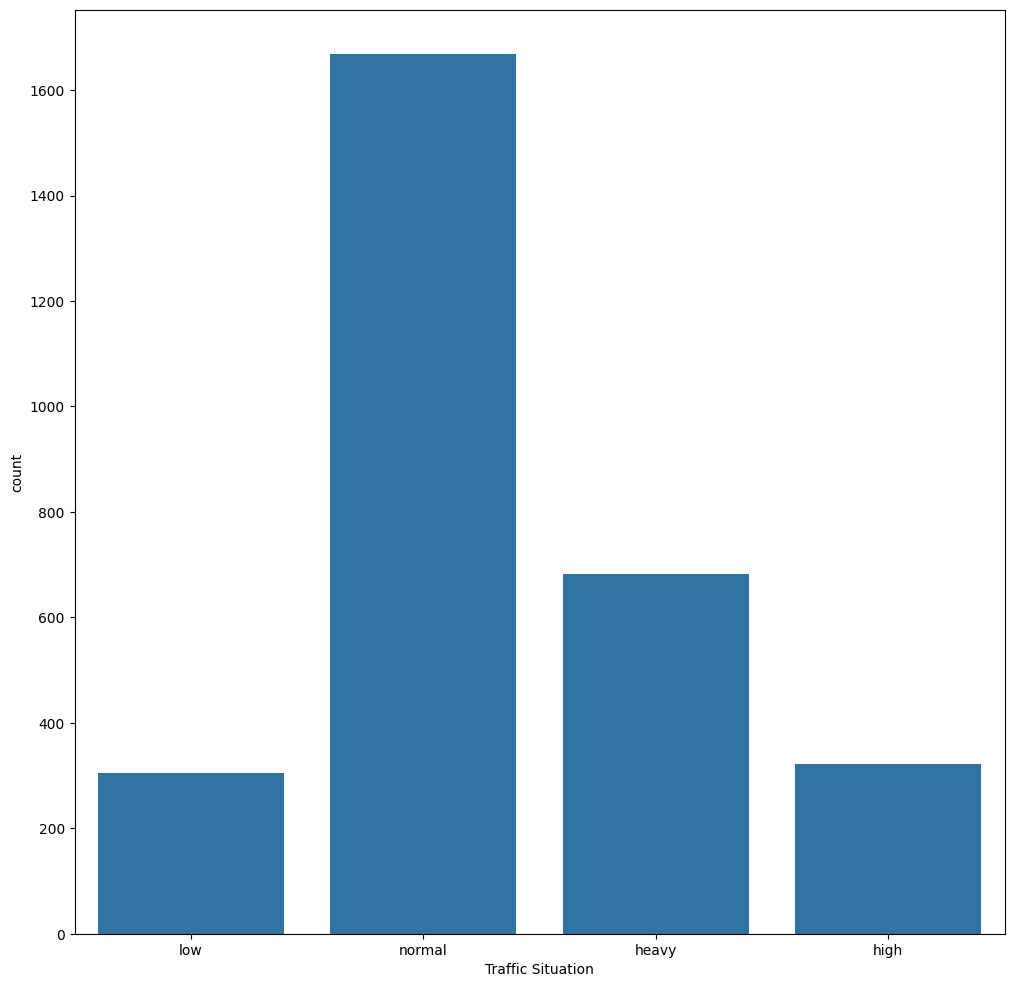

In [10]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,x='Traffic Situation')
plt.show()

Tình trạng giao thông ở đấy khá ổn với mức bình thường khá cao

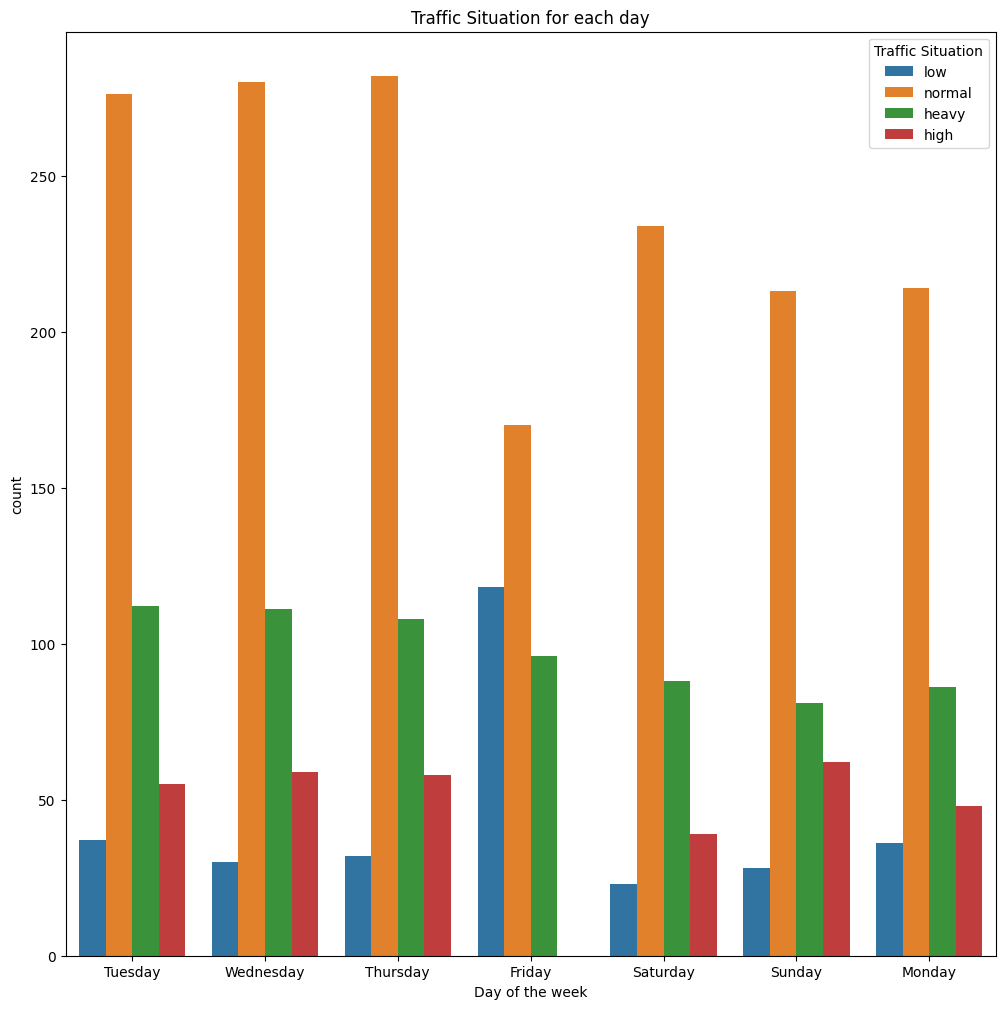

In [11]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,x='Day of the week',hue='Traffic Situation')
plt.title("Traffic Situation for each day")
plt.show()

Tình trạng giao thông trung bình theo ngày trong tháng

In [12]:
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time

# Kỹ thuật tạo đặc trưng: Tạo các đặc trưng như giờ, phút và ngày trong tuần
df['Hours'] = pd.to_datetime(df['Time'].astype(str)).dt.hour  # Trích xuất giờ từ thời gian
df['Minute'] = pd.to_datetime(df['Time'].astype(str)).dt.minute  # Trích xuất phút từ thời gian

# Tùy chọn: Thêm khoảng thời gian trong ngày (Sáng, Chiều, Tối, Đêm)
# def get_time_period(hour):
#     if 5 <= hour < 12:
#         return 'Sáng'
#     elif 12 <= hour < 17:
#         return 'Chiều'
#     elif 17 <= hour < 21:
#         return 'Tối'
#     else:
#         return 'Đêm'

print(df)

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0     00:00:00    10         Tuesday        31          0         4   
1     00:15:00    10         Tuesday        49          0         3   
2     00:30:00    10         Tuesday        46          0         3   
3     00:45:00    10         Tuesday        51          0         2   
4     01:00:00    10         Tuesday        57          6        15   
...        ...   ...             ...       ...        ...       ...   
2971  22:45:00     9        Thursday        16          3         1   
2972  23:00:00     9        Thursday        11          0         1   
2973  23:15:00     9        Thursday        15          4         1   
2974  23:30:00     9        Thursday        16          5         0   
2975  23:45:00     9        Thursday        14          3         1   

      TruckCount  Total Traffic Situation  Hours  Minute  
0              4     39               low      0       0  
1              3     55      

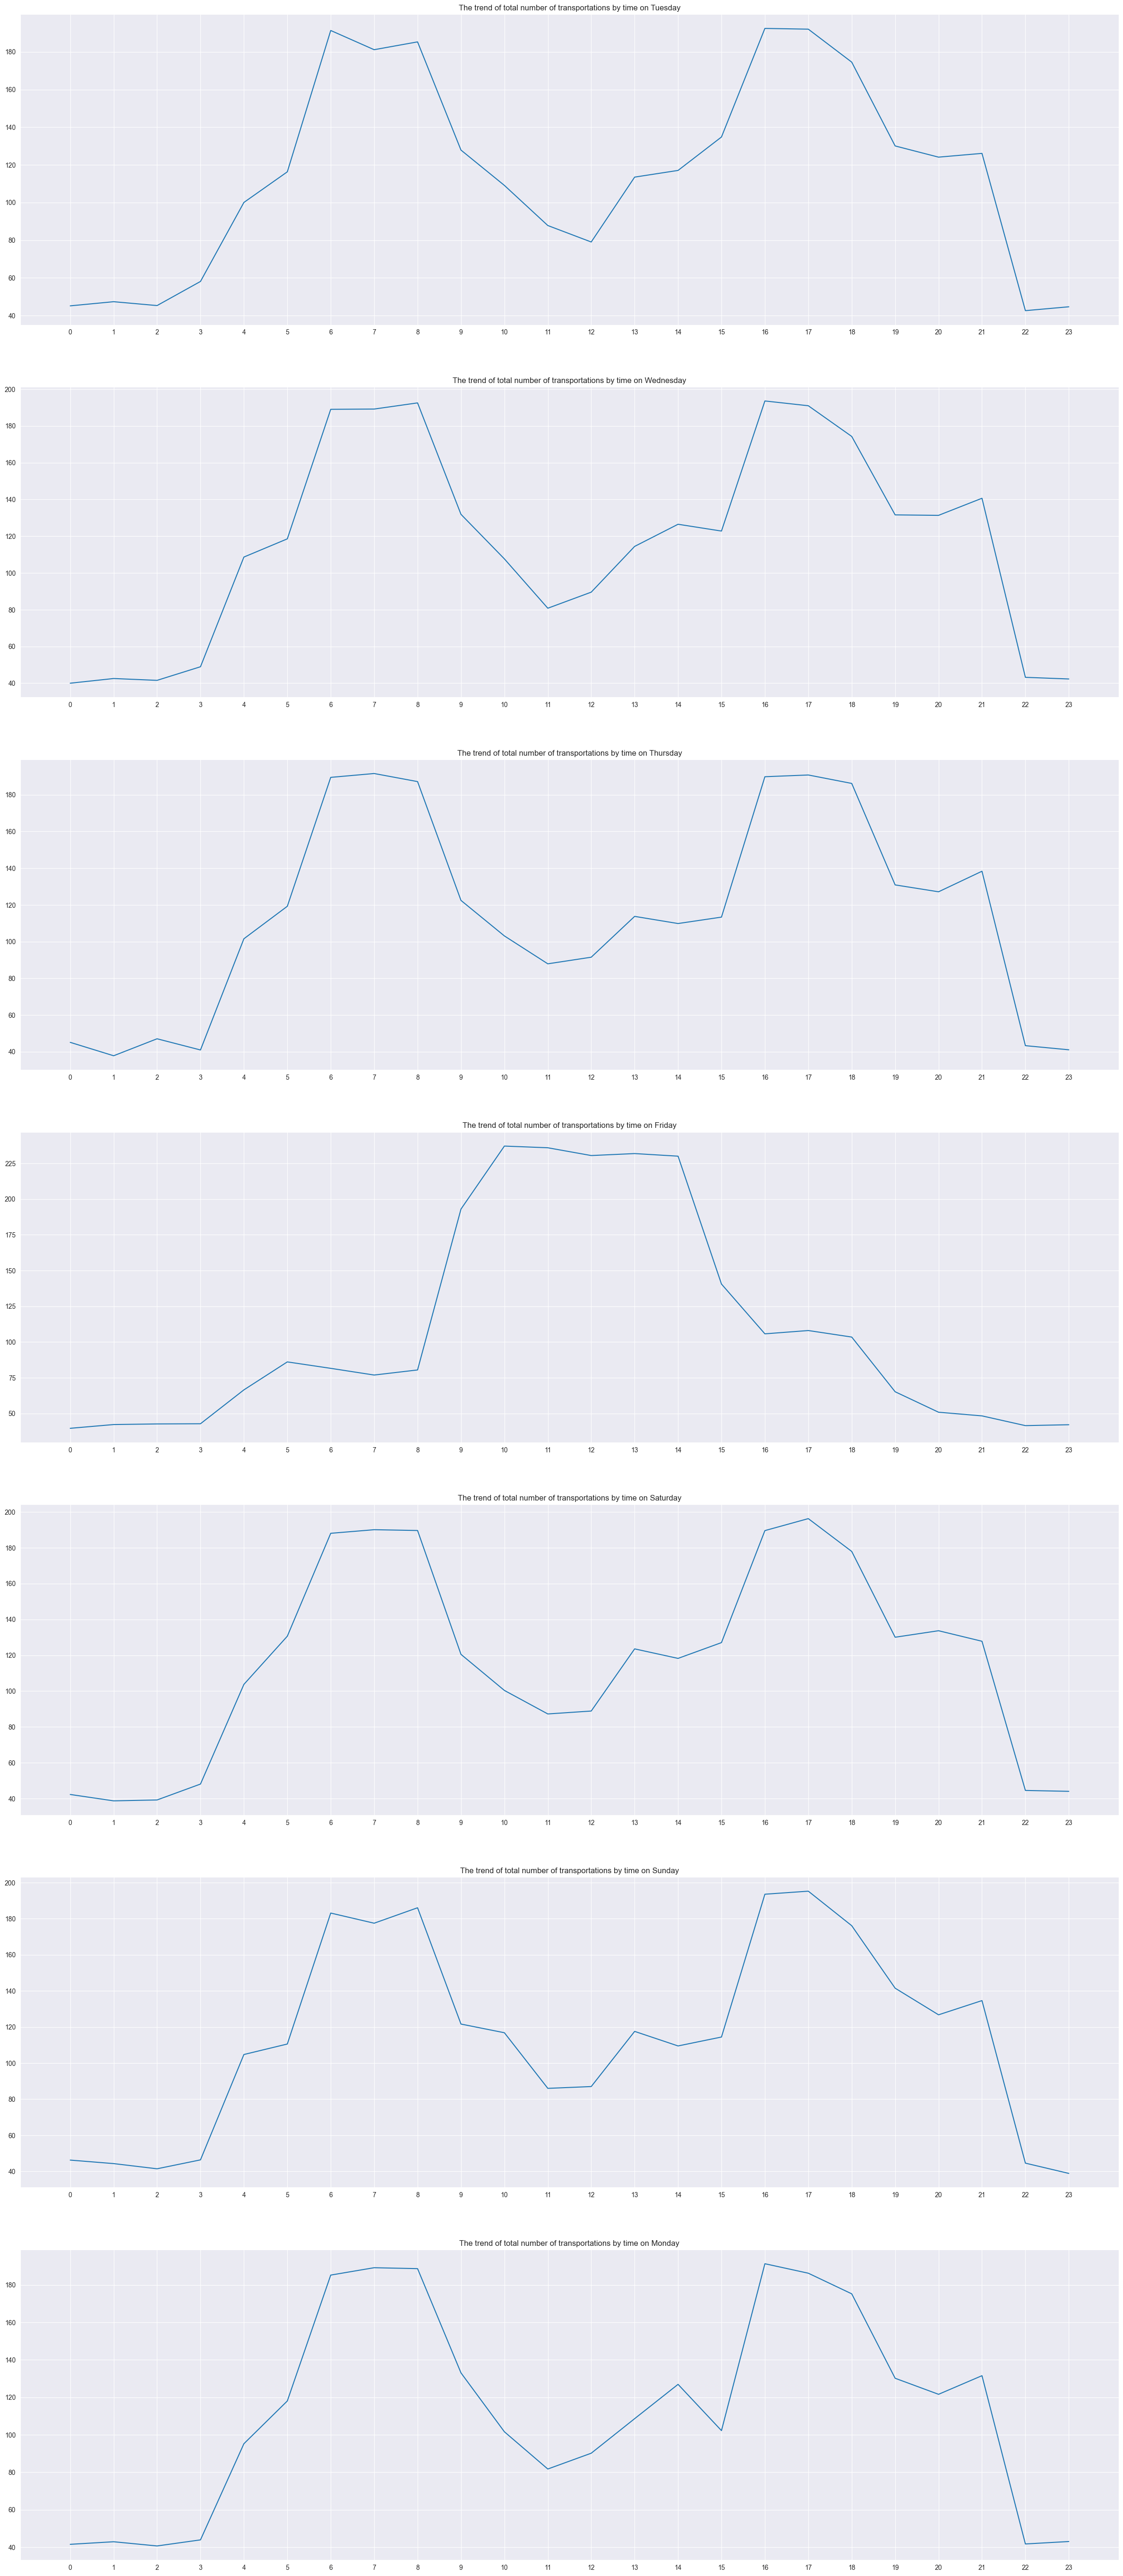

In [13]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(7,1, figsize =(30, 70))
i = 0

for day in df["Day of the week"].unique():
    daily_data = df[(df["Day of the week"] == day)]
    average_vehicle_counts = daily_data.groupby("Hours")["Total"].mean()
    axs[i].plot(average_vehicle_counts.index,average_vehicle_counts.values)
    axs[i].set_xticks(np.arange(0, 24, 1))
    
    axs[i].set_title(f"The trend of total number of transportations by time on {day}")
    i += 1

plt.show()

Tình trạng giao thông trở nên đông đúc từ lúc 6h - 8 h sáng và từ 4h - 6h chiều đây có vẽ như là giờ cao điểm giờ người dân đi làm và đi về

### Xử lý dữ liệu

Chuyển các cột có giá trị text sang số endcode và liệt kê các đặc trưng và nhãn dự đoán

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder_day = LabelEncoder()
label_encoder_traffic = LabelEncoder()
df['Day of the week'] = label_encoder_day.fit_transform(df['Day of the week'])
print(df['Day of the week'].unique())
X = df[['Hours', 'Minute', 'CarCount', 
        'BikeCount', 'BusCount', 'TruckCount', 'Day of the week']]
Y = df['Traffic Situation']
y = label_encoder_traffic.fit_transform(Y)
print(set(y))

[5 6 4 0 2 3 1]
{0, 1, 2, 3}


In [15]:
day_mapping = {i: day for i, day in enumerate(label_encoder_day.classes_)}
print("Day of the week mapping (encoded -> original):")
print(day_mapping)

# Tạo bảng mapping cho Traffic Situation
traffic_mapping = {i: status for i, status in enumerate(label_encoder_traffic.classes_)}
print("\nTraffic Situation mapping (encoded -> original):")
print(traffic_mapping)

Day of the week mapping (encoded -> original):
{0: 'Friday', 1: 'Monday', 2: 'Saturday', 3: 'Sunday', 4: 'Thursday', 5: 'Tuesday', 6: 'Wednesday'}

Traffic Situation mapping (encoded -> original):
{0: 'heavy', 1: 'high', 2: 'low', 3: 'normal'}


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=18, shuffle=False)

## Áp dụng các thuật toán học máy
### RandomForest Algorithm

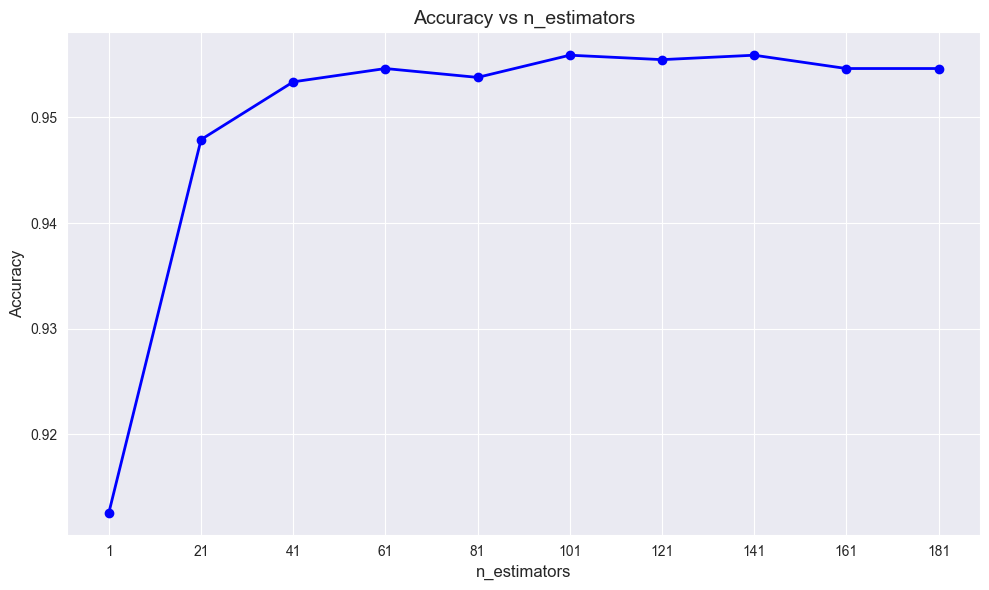

Best n_estimators: 101
Training Accuracy: 1.00
Test Accuracy: 0.96


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Tham số cần tối ưu
param_grid = {
    'n_estimators': range(1,200,20)
}
model_rf = RandomForestClassifier(random_state=42)
# cv=5 là 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=model_rf, 
                              param_grid=param_grid, cv=5, n_jobs=-1)  
grid_search_rf.fit(X_train, y_train)

results = grid_search_rf.cv_results_

# Lấy giá trị n_estimators và độ chính xác (mean_test_score)
n_estimators_values = results['param_n_estimators'].data
mean_test_scores = results['mean_test_score']

# Tạo DataFrame từ các giá trị
results_df = pd.DataFrame({
    'n_estimators': n_estimators_values,
    'mean_test_score': mean_test_scores
})

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(results_df['n_estimators'], results_df['mean_test_score'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Accuracy vs n_estimators', fontsize=14)
plt.xlabel('n_estimators', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.xticks(results_df['n_estimators'].astype(int))  # Đảm bảo các giá trị n_estimators là số nguyên
plt.tight_layout()
plt.show()

print(f"Best n_estimators: {grid_search_rf.best_params_['n_estimators']}")
y_train_pred = grid_search_rf.predict(X_train)
y_test_pred = grid_search_rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Quan sát: Mô hình cho thấy độ chính xác trên tập huấn luyện là 1.00 và độ chính xác trên tập kiểm tra là 0.96, điều này chỉ ra khả năng overfitting (quá khớp). Quá khớp xảy ra khi mô hình ghi nhớ dữ liệu huấn luyện, bao gồm cả nhiễu, dẫn đến độ chính xác cao trên tập huấn luyện nhưng khả năng tổng quát thấp với dữ liệu chưa thấy. Để giảm thiểu quá khớp, các kỹ thuật regularization (chính quy hóa) là cần thiết, vì chúng sẽ phạt các hệ số lớn và thúc đẩy các mô hình đơn giản hơn, cải thiện khả năng tổng quát và tăng cường độ bền của mô hình.

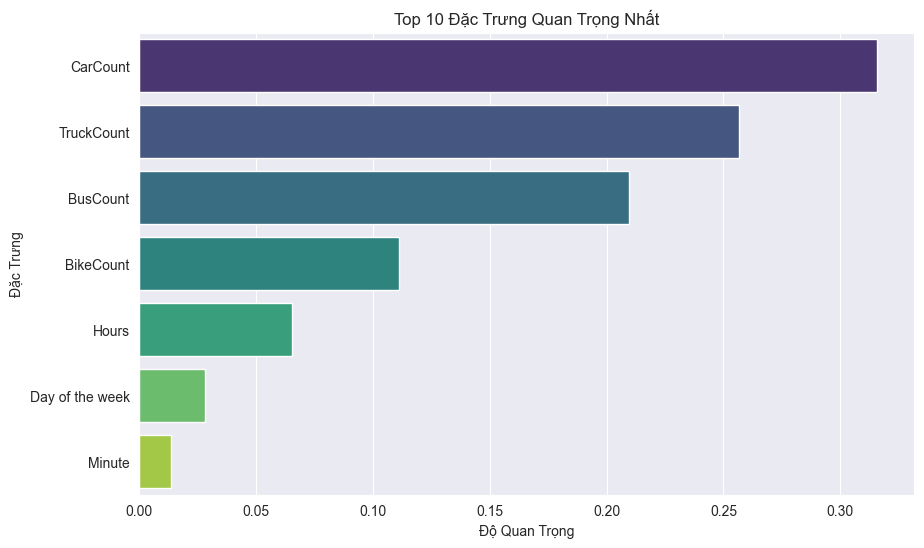

In [18]:
# Lấy mô hình đã tối ưu hóa từ grid_search
optimized_model = grid_search_rf.best_estimator_

# Lấy độ quan trọng của các đặc trưng từ mô hình tối ưu
importances = optimized_model.feature_importances_
feature_names = X_train.columns  # Giả sử các đặc trưng đầu vào của bạn có trong DataFrame

# Tạo một DataFrame để dễ dàng vẽ biểu đồ
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Đặc Trưng Quan Trọng Nhất')
plt.xlabel('Độ Quan Trọng')
plt.ylabel('Đặc Trưng')
plt.show()



### KNN

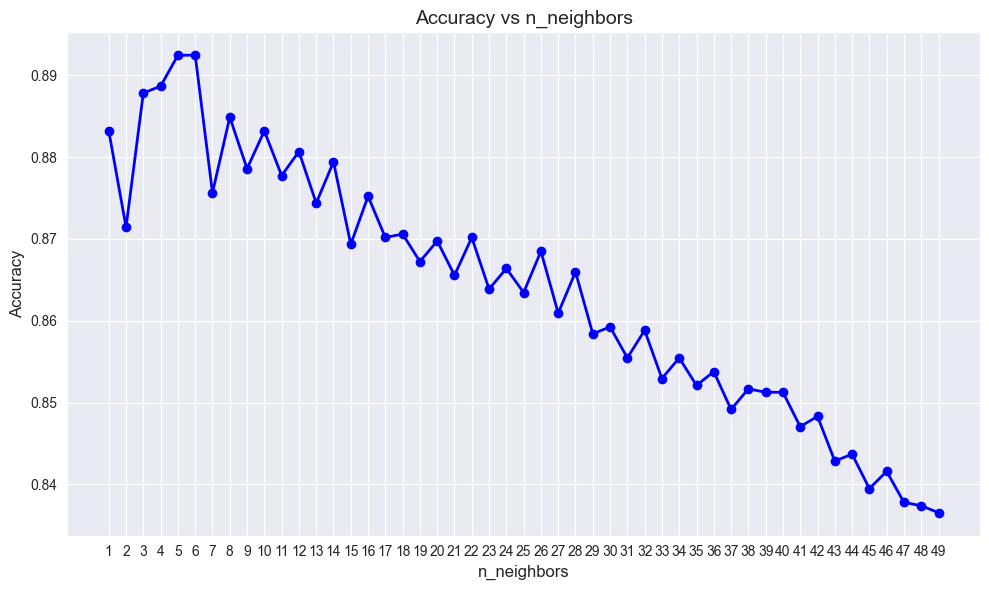

Best n_neighbors: 5
Training Accuracy: 0.94
Test Accuracy: 0.93


In [19]:
from sklearn.neighbors import KNeighborsClassifier
# Định nghĩa phạm vi các tham số cần tối ưu hoá cho KNN
param_grid = {
    'n_neighbors': range(1,50,1)
}

# Tạo mô hình KNN
model_knn = KNeighborsClassifier()

# Sử dụng GridSearchCV để tìm giá trị tối ưu cho n_neighbors
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5, n_jobs=-1)  # cv=5 là 5-fold cross-validation

# Huấn luyện mô hình với dữ liệu huấn luyện
grid_search_knn.fit(X_train, y_train)

# Trích xuất các kết quả của GridSearchCV
results = grid_search_knn.cv_results_

# Lấy giá trị n_neighbors và độ chính xác (mean_test_score)
n_neighbors_values = results['param_n_neighbors'].data
mean_test_scores = results['mean_test_score']

# Tạo DataFrame từ các giá trị
results_df = pd.DataFrame({
    'n_neighbors': n_neighbors_values,
    'mean_test_score': mean_test_scores
})

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(results_df['n_neighbors'], results_df['mean_test_score'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Accuracy vs n_neighbors', fontsize=14)
plt.xlabel('n_neighbors', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.xticks(results_df['n_neighbors'].astype(int))  # Đảm bảo các giá trị n_neighbors là số nguyên
plt.tight_layout()
plt.show()

print(f"Best n_neighbors: {grid_search_knn.best_params_['n_neighbors']}")

# Dự đoán trên dữ liệu huấn luyện và kiểm tra
y_train_pred = grid_search_knn.predict(X_train)
y_test_pred = grid_search_knn.predict(X_test)

# In ra độ chính xác của mô hình trên tập huấn luyện và kiểm tra
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

In [20]:
print(X_test.shape)

(596, 7)


## So sánh đánh giá các mô hình sau huấn luyện

Đánh giá và kiểm tra mô hình sau huấn luyện qua tập test

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [22]:
y_test_pred_knn = grid_search_knn.predict(X_test)

y_test_pred_rf = grid_search_rf.predict(X_test)

Các chỉ số đánh giá

Percission

Recall

F1-Score

Accuracy

In [23]:

print("Đánh gia mô hình random forest")
print(classification_report(y_test, y_test_pred_rf))


Đánh gia mô hình random forest
              precision    recall  f1-score   support

       heavy       0.96      0.95      0.95       139
        high       0.89      0.89      0.89        71
         low       0.90      0.93      0.92        41
      normal       0.98      0.98      0.98       345

    accuracy                           0.96       596
   macro avg       0.93      0.94      0.93       596
weighted avg       0.96      0.96      0.96       596



In [24]:
print("Đánh giá mô hình KNN")
print(classification_report(y_test, y_test_pred_knn))

Đánh giá mô hình KNN
              precision    recall  f1-score   support

       heavy       0.96      0.96      0.96       139
        high       0.89      0.83      0.86        71
         low       0.83      0.73      0.78        41
      normal       0.93      0.96      0.95       345

    accuracy                           0.93       596
   macro avg       0.90      0.87      0.89       596
weighted avg       0.93      0.93      0.93       596



Ma trận đường chéo chính confusion_matrix

Ma trận nhầm lẫn là ma trận mà mà tại đường chéo chính mà thuật toán đoán đúng nhãn

Ma trận nhầm lẫn chính của mô hình KNN


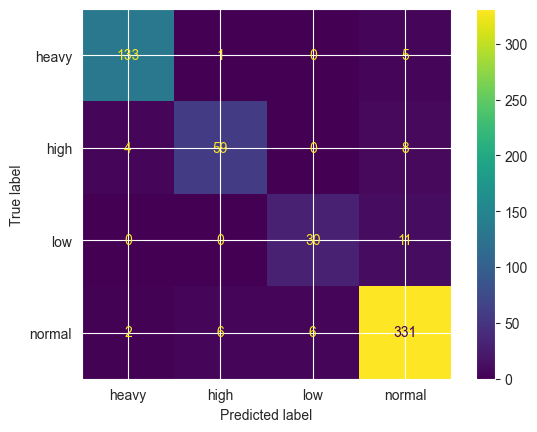

In [25]:
# Ma trận nhầm lẫn với knn
print("Ma trận nhầm lẫn chính của mô hình KNN")
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_knn))

Ma trận nhầm lẫn của mô hình Random Forest


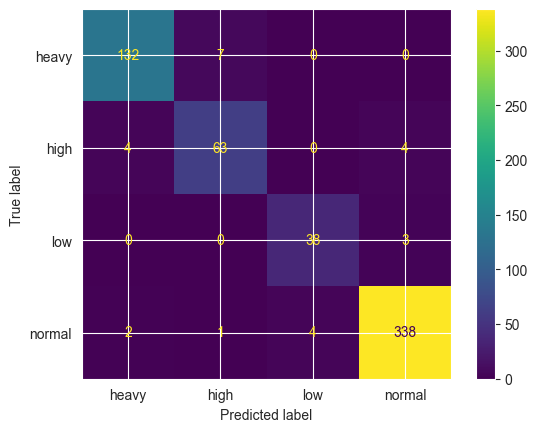

In [26]:
# Ma trận nhầm lẫn với random forest
print("Ma trận nhầm lẫn của mô hình Random Forest")
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rf))

In [30]:
print(X_test.head(1))

      Hours  Minute  CarCount  BikeCount  BusCount  TruckCount  \
2380     19       0        71         26        19           1   

      Day of the week  
2380                0  


### Lưu trữ mô hình sau khi đánh giá dùng thư viện joblib 

In [28]:
import joblib
current_save_model = os.getcwd() + "\\app\\model_store"
print(current_save_model)

c:\Users\Le Khac Ninh 2\Desktop\classification_trafic_street\app\model_store


In [29]:
joblib.dump(grid_search_rf, f"{current_save_model}\\random_forest_model.pkl")
joblib.dump(grid_search_knn, f"{current_save_model}\\knn_model.pkl")

['c:\\Users\\Le Khac Ninh 2\\Desktop\\classification_trafic_street\\app\\model_store\\knn_model.pkl']